<a href="https://colab.research.google.com/gist/jonghank/a8bd26f8e3abb554aafd09de55f547d4/ase3001_discrete_fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discrete Fourier transform

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\C}{\mathbf{C}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$



__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


- 간단한 소리 신호를 생성한다.
- 이산화된 푸리에 변환을 이용하여 주파수를 분석한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

푸리에 변환을 통해 시간 도메인의 신호를 주파수 도메인으로 변환할 수 있다.

$N$개로 이산화된 시간 신호 $x_0, x_1,\dots, x_{N-1} \in \mathbb{C}$ 의 Discrete Fourier Transformation (DFT) $X= \mathcal{F} \{x\}$ 는 다음과 같이 정의된다.  

$$
\begin{align}
  X_k &= \sum_{n=0}^{N-1}x_n e^{-j2\pi kn/N}  \\
  &= \sum_{n=0}^{N-1}x_n \left\{\cos\left(2\pi kn/N\right)-j\sin\left(2\pi kn/N\right)\right\} \\
\end{align}
$$

여기서  $X_0, X_1, \dots, X_{N-1} \in \mathbb{C}$는 주파수 성분이며, 오일러 공식 $e^{j\theta} = \cos\theta + j\sin\theta$가 적용되었다.


푸리에 변환의 역변환 $x = \mc{F}^{-1}\{X\}$ 은 다음과 같이 정의된다.

$$
\begin{align}
  x_n = \frac{1}{N}\sum_{k=0}^{N-1}X_k e^{j2\pi kn/N}
\end{align}
$$



위의 표현에서 DFT가 선형 특성을 가짐을 알 수 있으므로, 행렬곱을 이용하여 다음을 도출할 수 있다.

$$
X=\bmat{X_0 \\ X_1 \\ X_2 \\ \vdots \\ X_{N-1}}
= \bmat{
1 & 1 & 1 &  \cdots & 1 \\
1 & \omega & \omega^2 &  \cdots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)(N-1)}
}
\bmat{x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{N-1}}
= Wx
$$

여기서, $x = \mc{F}^{-1}\{X\} = W^{-1}X$이고, 역변환은 다음을 따른다.


$$
  W^{-1} = \frac{1}{N}W^H
$$

- $N = 32$의 DFT matrix를 생성한다.

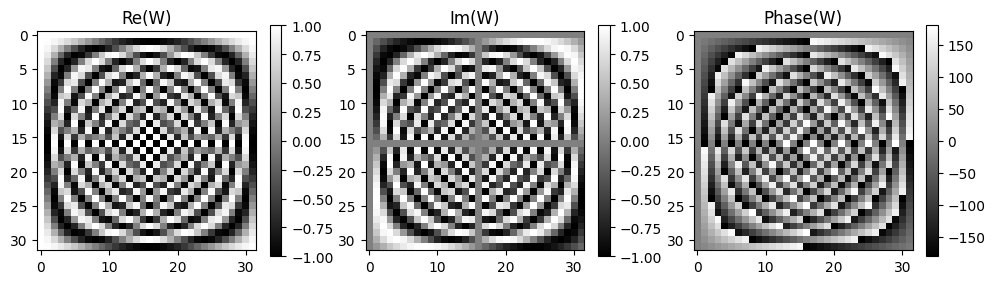

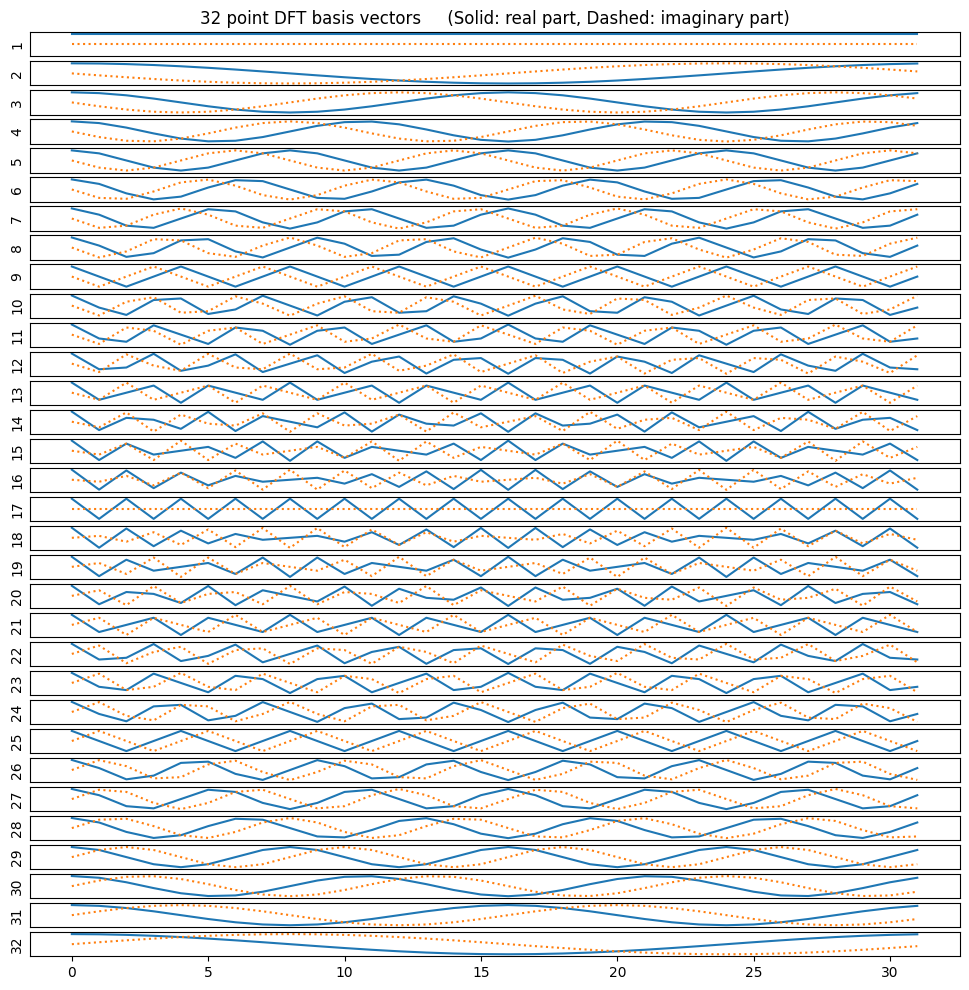

In [ ]:
N = 32
omega = np.exp(-1j*2*np.pi/N)
W = np.ones((N,N), dtype=complex)
for i in range(1,N):
  for j in range(i,N):
    W[i,j] = omega**(i*j)
    W[j,i] = W[i,j]

diff = np.linalg.inv(W) - np.conj(W)/N
np.linalg.norm(diff)

plt.figure(figsize=(12,3), dpi=100)
plt.subplot(131)
plt.imshow(W.real, cmap='gray')
plt.title('Re(W)')
plt.colorbar()
plt.subplot(132);
plt.imshow(W.imag, cmap='gray')
plt.title('Im(W)')
plt.colorbar()
plt.subplot(133);
plt.imshow(np.angle(W)*180/np.pi, cmap='gray')
plt.title('Phase(W)')
plt.colorbar()
plt.show()

plt.figure(figsize=(12,12), dpi=100)
for i in range(N):
  plt.subplot(N,1,i+1)
  if i==0:
    plt.title(f'{N} point DFT basis vectors \
    (Solid: real part, Dashed: imaginary part)')
  plt.plot(W[i,:].real, label='Re')
  plt.plot(W[i,:].imag, ':', label='Im')
  plt.yticks([])
  if i!=N-1:
    plt.xticks([])
  plt.ylim(-1.2,1.2)
  plt.ylabel(f'{i+1}')
plt.show()



- Sine 함수를 이용하여 서로 다른 주파수를 갖는 소리 신호 $x_l(t)$와 $x_r(t)$를 생성한다.

$$
  x_l(t) =2\sin(2\pi\times 220t)\\
  x_r(t) =\sin(2\pi\times 225t)\\
  x(t) =x_l(t) + x_r(t)
$$

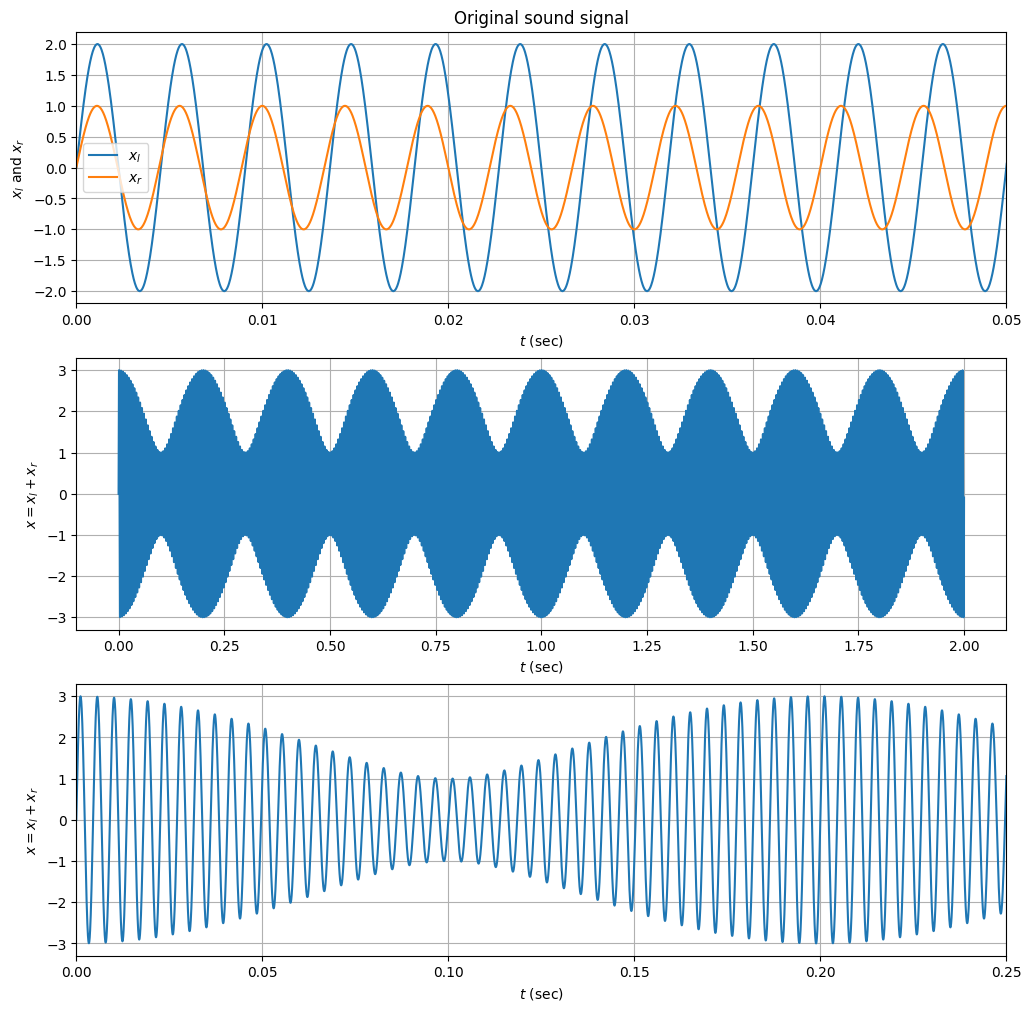

In [ ]:
# Create a sound
fs = 44100
dt = 1/fs
t = np.arange(0,2,dt)
xl = 2*np.sin(2*np.pi*220*t)
xr = np.sin(2*np.pi*225*t)
x = xl + xr

plt.figure(figsize=(12,12), dpi=100)
plt.subplot(311)
plt.plot(t,xl, label=r'$x_l$')
plt.plot(t,xr, label=r'$x_r$')
plt.xlim(0,0.05)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_l$ and $x_r$')
plt.title('Original sound signal')
plt.grid()
plt.legend()
plt.subplot(312)
plt.plot(t,x)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x=x_l + x_r$')
plt.grid()
plt.subplot(313)
plt.plot(t,x)
plt.xlim(0,0.25)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x=x_l + x_r$')
plt.grid()
plt.show()

In [ ]:
from IPython.display import Audio

# play in mono
Audio(x, rate=fs, autoplay=True)

In [ ]:
# play in stereo
Audio([xl, xr], rate=fs, autoplay=True)

- Sound signal $x(t)$에 DFT를 적용한다. <br>
    `numpy.fft.fft()`

In [ ]:
N, 1/dt

(32, 44100.0)

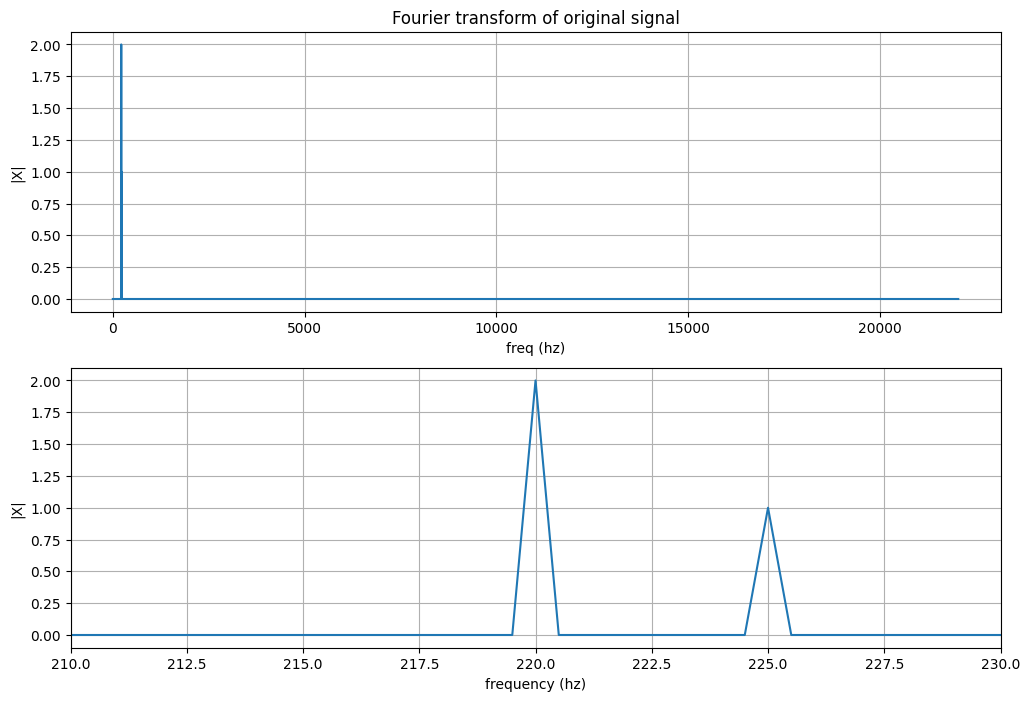

In [ ]:
N = len(x)

df = fs/N                 # df = fs/N
f = np.arange(0,N)*df     # f = [0, df, 2*df,..., (N-1)*df]

X = np.fft.fft(x)*dt

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(f[0:int(N/2+1)],np.abs(X[0:int(N/2+1)]))
plt.xlabel('freq (hz)')
plt.ylabel(r'|X|')
plt.title('Fourier transform of original signal')
plt.grid()
plt.subplot(212)
plt.plot(f[0:int(N/2+1)],np.abs(X[0:int(N/2+1)]))
plt.xlabel('frequency (hz)')
plt.ylabel(r'|X|')
plt.grid()
plt.xlim(210,230)
plt.show()

- Sound signal에 원 신호 대비 10배 수준의 음량을 갖는 매우 큰 화이트 노이즈를 합성한다.


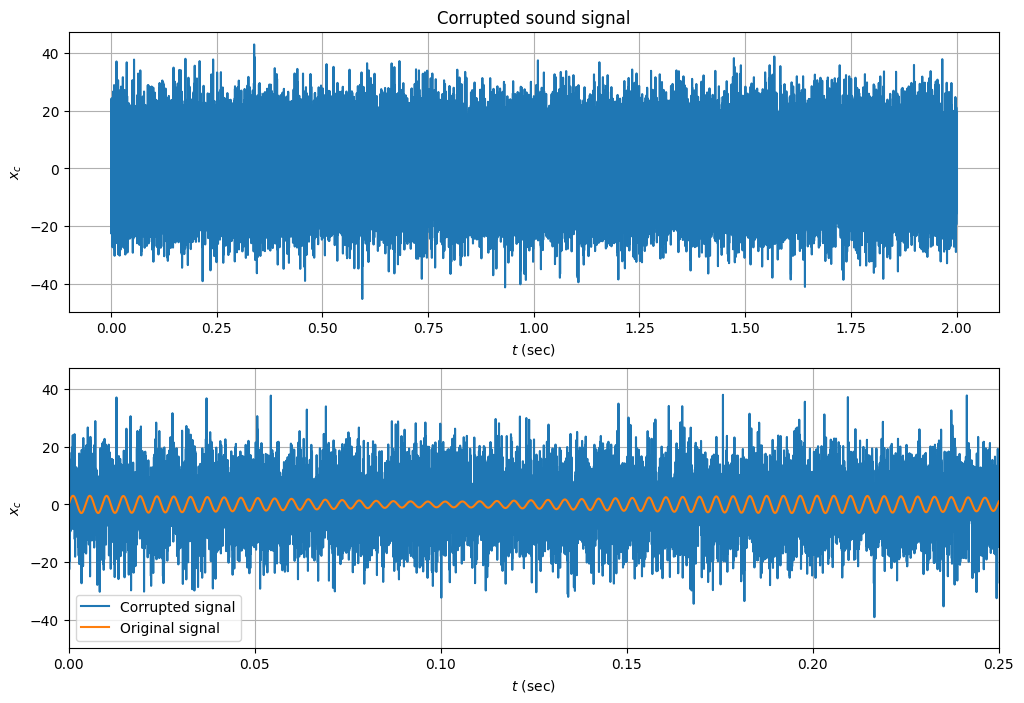

In [ ]:
np.random.seed(1)
x_c = x + 10*np.random.randn(len(x))

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(t,x_c)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_c$')
plt.title('Corrupted sound signal')
plt.grid()
plt.subplot(212)
plt.plot(t,x_c, label='Corrupted signal')
plt.plot(t,x, label='Original signal')
plt.xlim(0,0.25)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_c$')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# play corrupted signal
Audio(x_c, rate=fs, autoplay=True)

- 노이즈가 합성된 Sound signal $x_c$에 DFT를 적용한다. DFT를 적용하여 산출된 주파수 성분 $X_c$는 합성된 노이즈로 인해 원 신호에는 존재하지 않았던 넓은 대역폭의 성분들이 존재한다.

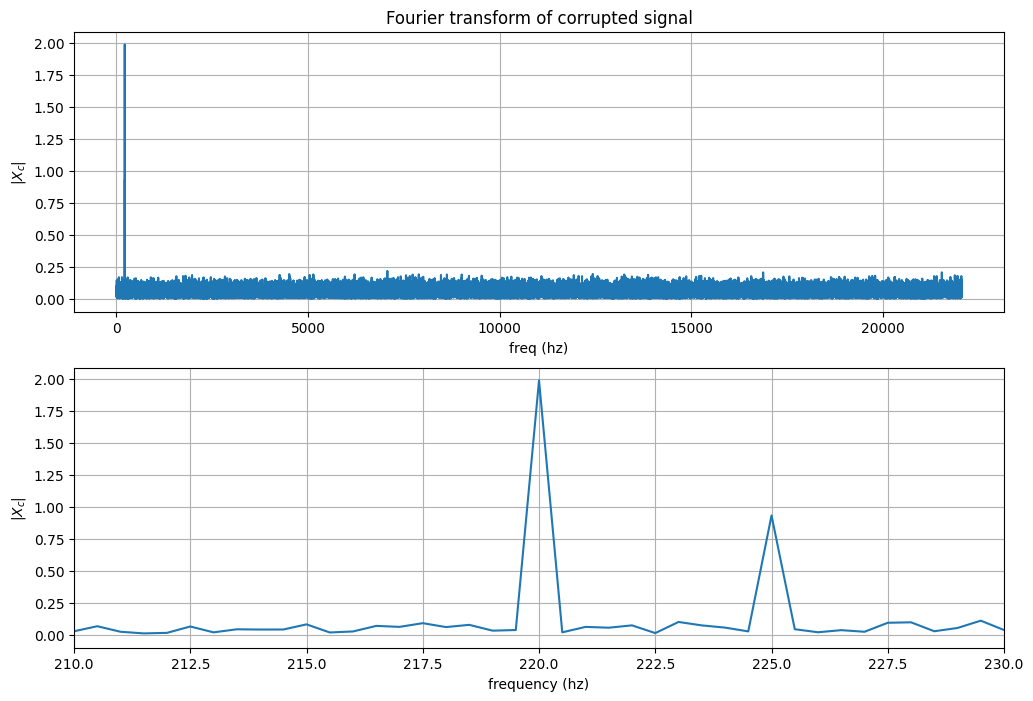

In [ ]:
df = fs/N                 # df = fs/N
f = np.arange(0,N)*df     # f = [0, df, 2*df,..., (N-1)*df]

X_c = np.fft.fft(x_c)*dt

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(f[0:int(N/2+1)],np.abs(X_c[0:int(N/2+1)]))
plt.xlabel('freq (hz)')
plt.ylabel(r'$|X_c|$')
plt.title('Fourier transform of corrupted signal')
plt.grid()
plt.subplot(212)
plt.plot(f[0:int(N/2+1)],np.abs(X_c[0:int(N/2+1)]))
plt.xlabel('frequency (hz)')
plt.ylabel(r'$|X_c|$')
plt.grid()
plt.xlim(210,230)
plt.show()

- 주파수 성분에서 필요없는 성분을 제거하기 위해 주파수 성분 최대값의 10%보다 작은 값을 가지는 주파수 성분은 제거한다.

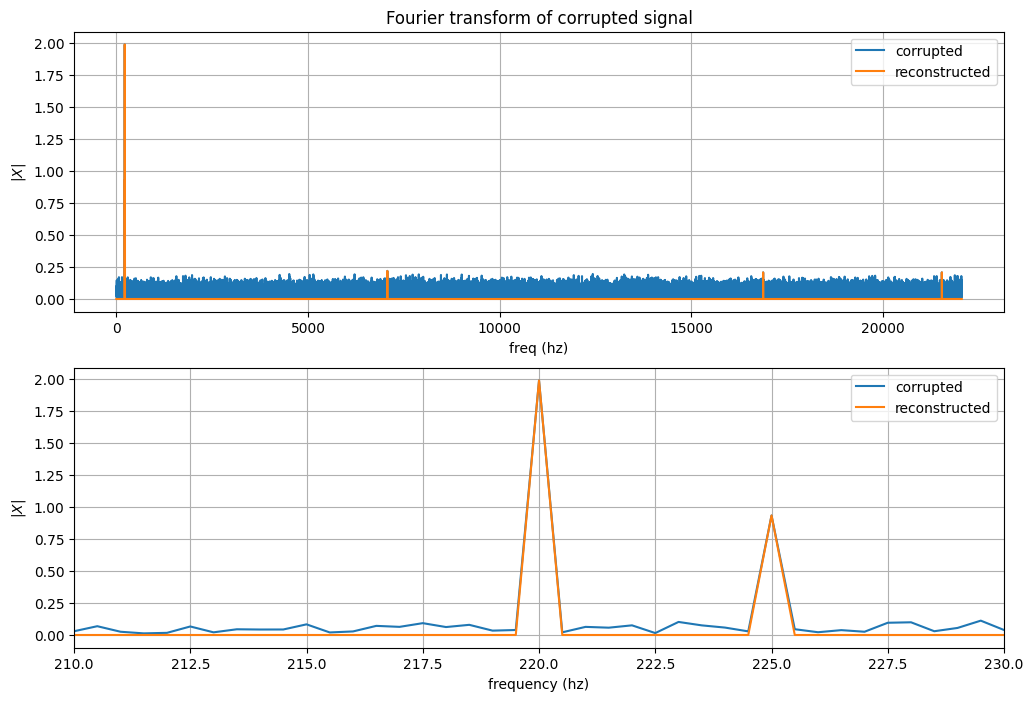

In [ ]:
X_recon = np.copy(X_c)
X_recon[np.abs(X_recon)<0.1*np.max(np.abs(X_recon))] = 0

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(f[0:int(N/2+1)],np.abs(X_c[0:int(N/2+1)]), label='corrupted')
plt.plot(f[0:int(N/2+1)],np.abs(X_recon[0:int(N/2+1)]), label='reconstructed')
plt.xlabel('freq (hz)')
plt.ylabel(r'$|X|$')
plt.legend()
plt.title('Fourier transform of corrupted signal');
plt.grid()
plt.subplot(212)
plt.plot(f[0:int(N/2+1)],np.abs(X_c[0:int(N/2+1)]), label='corrupted')
plt.plot(f[0:int(N/2+1)],np.abs(X_recon[0:int(N/2+1)]), label='reconstructed')
plt.xlabel('frequency (hz)')
plt.ylabel(r'$|X|$')
plt.legend()
plt.grid()
plt.xlim(210,230)
plt.show()

역변환을 적용하여 노이즈를 제거한 $X_\text{reconstructed}$를 구한다.<br>
 `numpy.fft.ifft()`

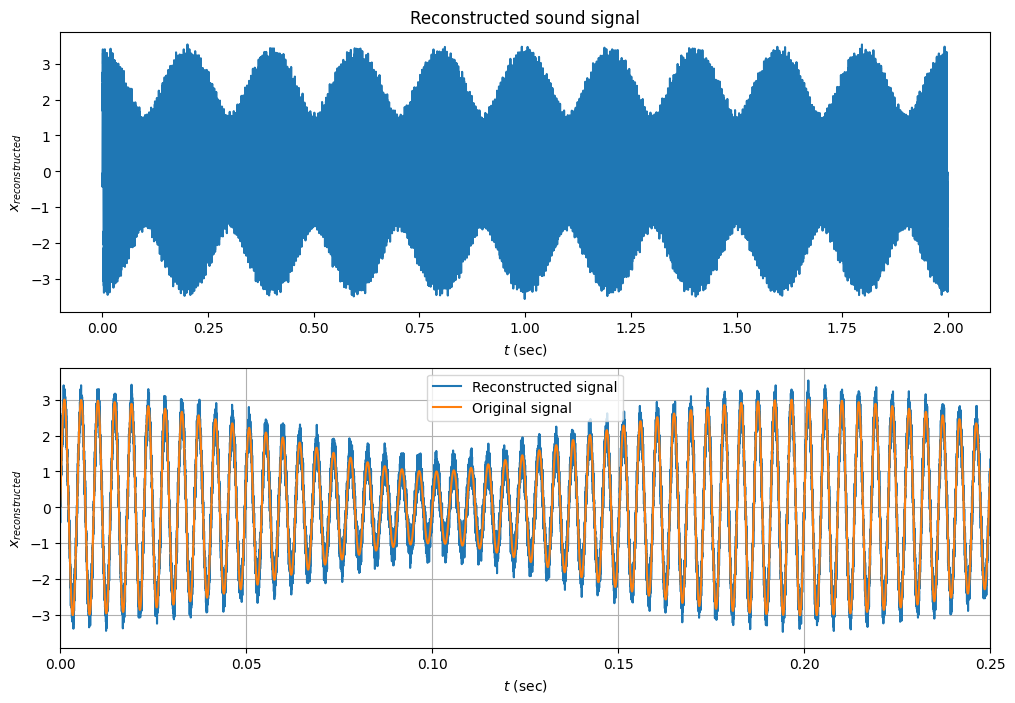

In [ ]:
x_recon = np.fft.ifft(X_recon).real*fs

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(t,x_recon)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_{reconstructed}$')
plt.title('Reconstructed sound signal')
plt.subplot(212)
plt.plot(t,x_recon, label='Reconstructed signal')
plt.plot(t,x, label='Original signal')
plt.xlim(0,0.25)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_{reconstructed}$')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# play reconstructed signal
Audio(x_recon, rate=fs, autoplay=True)